In [53]:
import sqlite3
from pathlib import Path

import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

query = "SELECT * FROM measurements"
conn = sqlite3.connect('../results.db')  # FIXME: update to use your own data
df = pd.read_sql_query(query, conn)

df[['API Gateway', 'backend']] = df['target'].str.split(pat='/', expand=True)

sns.set(style="white", font="Lato")
sns.set_context("talk")

df.head()

,id,client,target,elapsed,result,API Gateway,backend
0,1,AWS,Apigee X/AWS,0.786945,c4ca4238a0b923820dcc509a6f75849b,Apigee X,AWS
1,2,GCP,Direct/AWS,0.038497,c81e728d9d4c2f636f067f89cc14862c,Direct,AWS
2,3,AWS,Apigee Hybrid (GCP)/GCP,0.041595,eccbc87e4b5ce2fe28308fd9f2a7baf3,Apigee Hybrid (GCP),GCP
3,4,External,Apigee Hybrid (AWS)/GCP,0.249647,a87ff679a2f3e71d9181a67b7542122c,Apigee Hybrid (AWS),GCP
4,5,GCP,Apigee X/GCP,0.236403,e4da3b7fbbce2345d7772b0674a318d5,Apigee X,GCP


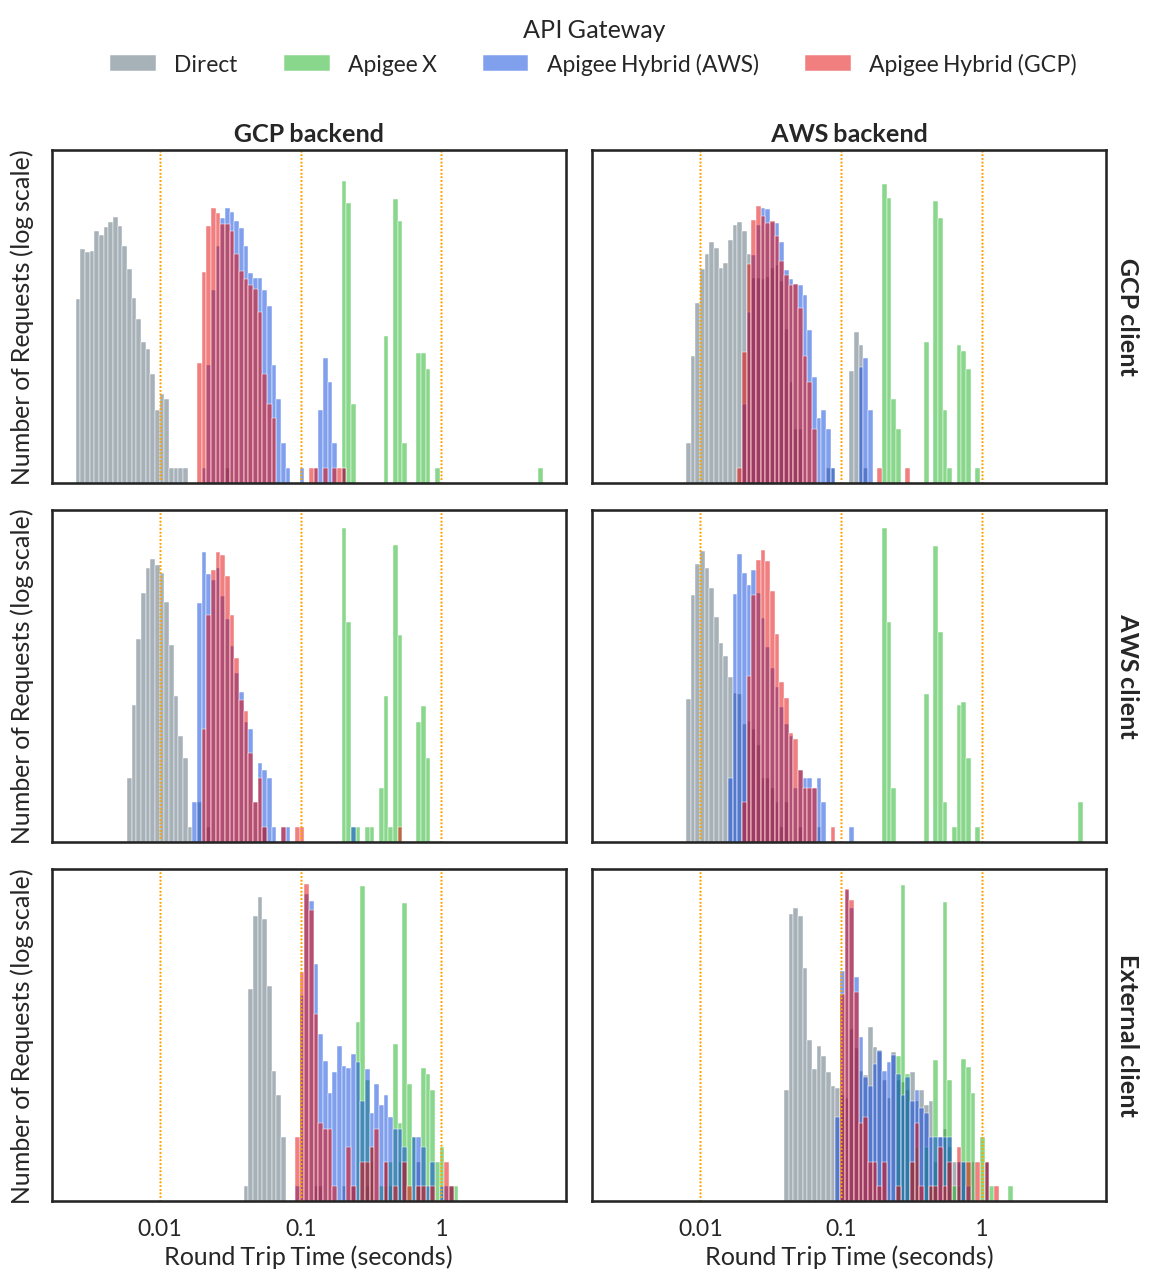

In [54]:
g = sns.FacetGrid(
    df,
    row='client',
    row_order=['GCP', 'AWS', 'External'],
    col='backend',
    col_order=['GCP', 'AWS'],
    margin_titles=True,
    height=4,
    aspect=1.5,
    despine=False,
    hue='API Gateway',
    hue_order=['Direct', 'Apigee X', 'Apigee Hybrid (AWS)', 'Apigee Hybrid (GCP)'],
    palette=sns.xkcd_palette(['slate', 'green', 'blue', 'red']),
)
g.map_dataframe(
    sns.histplot,
    x='elapsed',
    log_scale=(True, True),
    common_bins=True,
    common_norm=True,
    bins=100,
    binrange=(np.log10(df['elapsed'].min()), np.log10(df['elapsed'].max())),
    hue='API Gateway',
    hue_order=['Direct', 'Apigee X', 'Apigee Hybrid (AWS)', 'Apigee Hybrid (GCP)'],
    palette=sns.xkcd_palette(['slate', 'green', 'blue', 'red']),
)
g.set_axis_labels(
    "Round Trip Time (seconds)",
    "Number of Requests (log scale)",
)
g.set(
    xticks=[0.01, 0.1, 1],
    yticks=[],
)
g.set_xticklabels([0.01, 0.1, 1])
g.refline(
    x=0.01,
    color='orange',
    linewidth=1,
    linestyle='dotted',
)
g.refline(
    x=0.1,
    color='orange',
    linewidth=1,
    linestyle='dotted',
)
g.refline(
    x=1,
    color='orange',
    linewidth=1,
    linestyle='dotted',
)
g.set_titles(
    col_template="{col_name} backend",
    row_template="{row_name} client",
    weight='bold',
)
g.tight_layout()
g.add_legend()
sns.move_legend(
    g,
    "lower center",
    bbox_to_anchor=(.42, 1),
    ncol=4,
)
g.savefig('../results-hist-log.png')

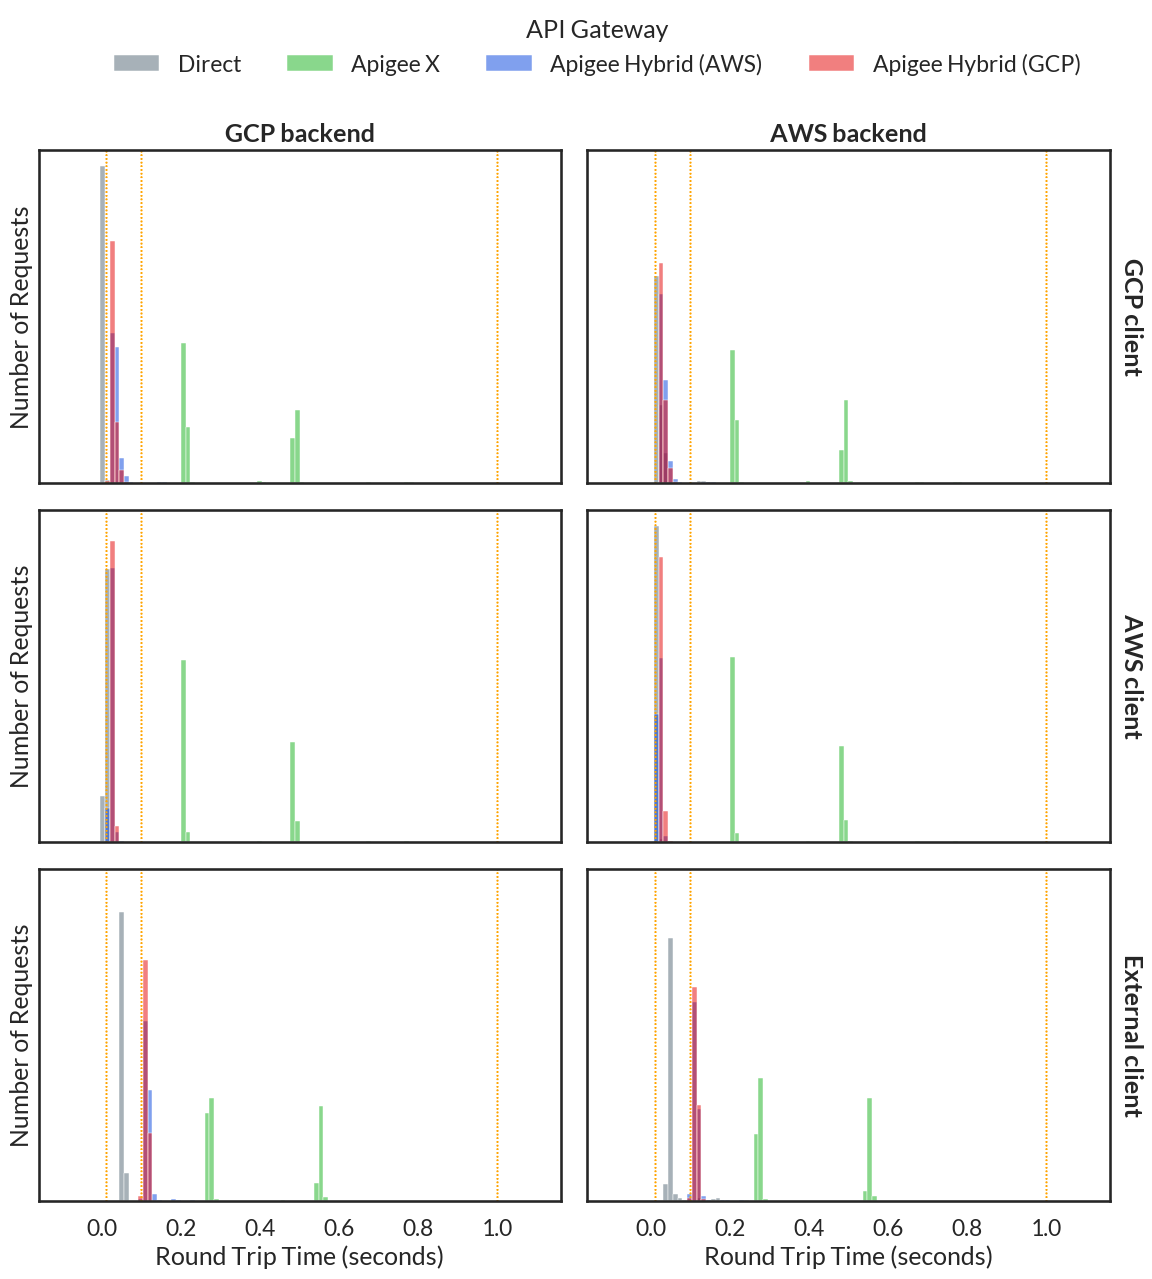

In [55]:
g = sns.FacetGrid(
    df,
    row='client',
    row_order=['GCP', 'AWS', 'External'],
    col='backend',
    col_order=['GCP', 'AWS'],
    margin_titles=True,
    height=4,
    aspect=1.5,
    despine=False,
    hue='API Gateway',
    hue_order=['Direct', 'Apigee X', 'Apigee Hybrid (AWS)', 'Apigee Hybrid (GCP)'],
    palette=sns.xkcd_palette(['slate', 'green', 'blue', 'red']),
)
g.map_dataframe(
    sns.histplot,
    x='elapsed',
    common_bins=True,
    common_norm=True,
    bins=100,
    binrange=(-.1, 1.1),
    hue='API Gateway',
    hue_order=['Direct', 'Apigee X', 'Apigee Hybrid (AWS)', 'Apigee Hybrid (GCP)'],
    palette=sns.xkcd_palette(['slate', 'green', 'blue', 'red']),
)
g.set_axis_labels(
    "Round Trip Time (seconds)",
    "Number of Requests",
)
g.set(
    xticks=(0, 0.2, 0.4, 0.6, 0.8, 1),
    yticks=[],
)
g.refline(
    x=0.01,
    color='orange',
    linewidth=1,
    linestyle='dotted',
)
g.refline(
    x=0.1,
    color='orange',
    linewidth=1,
    linestyle='dotted',
)
g.refline(
    x=1,
    color='orange',
    linewidth=1,
    linestyle='dotted',
)
g.set_titles(
    col_template="{col_name} backend",
    row_template="{row_name} client",
    weight='bold',
)
g.tight_layout()
g.add_legend()
sns.move_legend(
    g,
    "lower center",
    bbox_to_anchor=(.42, 1),
    ncol=4,
)
g.savefig('../results-hist.png')

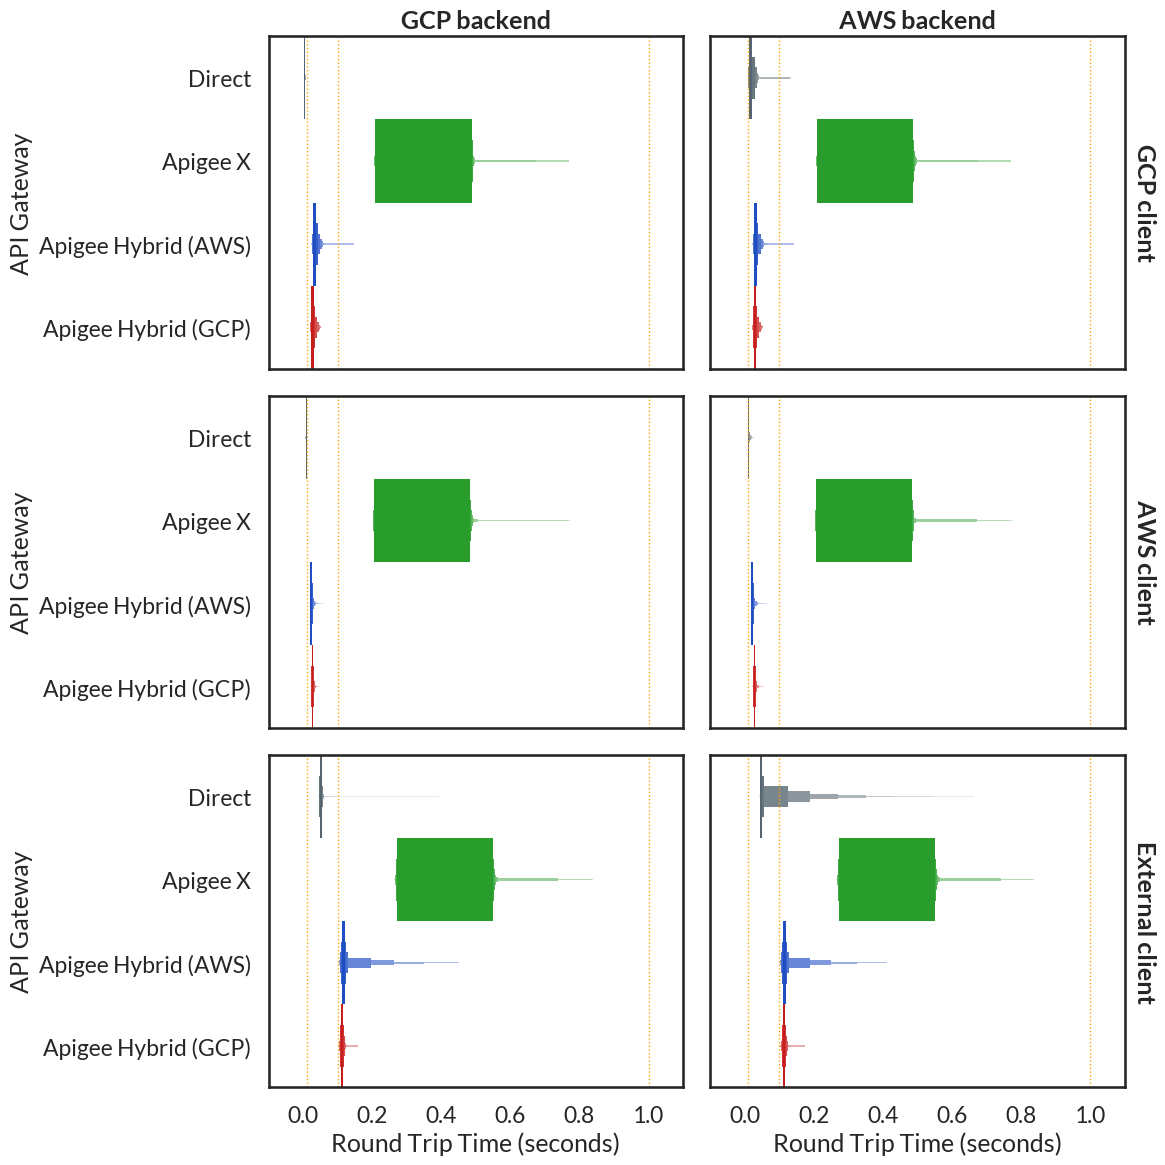

In [56]:
g = sns.FacetGrid(
    df,
    row='client',
    row_order=['GCP', 'AWS', 'External'],
    col='backend',
    col_order=['GCP', 'AWS'],
    margin_titles=True,
    height=4,
    aspect=1.5,
    despine=False,
    hue_order=['Direct', 'Apigee X', 'Apigee Hybrid (AWS)', 'Apigee Hybrid (GCP)'],
    palette=sns.xkcd_palette(['slate', 'green', 'blue', 'red']),
)
g.map_dataframe(
    sns.boxenplot,
    x='elapsed',
    y='API Gateway',
    order=['Direct', 'Apigee X', 'Apigee Hybrid (AWS)', 'Apigee Hybrid (GCP)'],
    palette=sns.xkcd_palette(['slate', 'green', 'blue', 'red']),
    linewidth=0,
    outlier_prop=0.99,
    showfliers=False,
    width=1,
)
g.set_axis_labels(
    "Round Trip Time (seconds)",
    "API Gateway",
)
g.set(
    xlim=(-.1, 1.1),
    xticks=(0, 0.2, 0.4, 0.6, 0.8, 1),
)
g.refline(
    x=0.01,
    color='orange',
    linewidth=1,
    linestyle='dotted',
)
g.refline(
    x=0.1,
    color='orange',
    linewidth=1,
    linestyle='dotted',
)
g.refline(
    x=1,
    color='orange',
    linewidth=1,
    linestyle='dotted',
)
g.set_titles(
    col_template="{col_name} backend",
    row_template="{row_name} client",
    weight='bold',
)
g.tight_layout()
g.savefig('../results-box.png')
